#순환 신경망으로 IMDB 리뷰 분류하기
##IT융합자율학부 201814076 권혁준

##자연어 처리(natural language processiong, NLP)
- 컴퓨터를 사용해 인간의 언어를 처리하는 분야
- 음성 인식, 기계 번역, 감성 분석 등
- 말뭉치(corpus)
  - 자연어 처리 분야에서 사용하는 (훈련)데이터
- 토큰(token)
  - 말뭉치에서 분리된 단어
  - 하나의 샘플(시퀀스)는 여러 개의 토큰으로 구성
  - 하나의 타임스텝에 해당

## 텍스트 데이터
- 컴퓨터에서 처리하는 모든 것은 숫자 데이터
- 텍스트 데이터의 경우 단어를 숫자로 바꾸는 과정이 필요
  - 영어 문장을 모두 소문자로 바꾸고 구둣점을 삭제한 후 공백을 기준으로 분리하여 토큰을 생성
  - 한글은 조사가 발달하여 형태소 분석을 통해 토큰을 생성

##어휘 사전
- 훈련 세트에서 고유한 단어를 뽑아 만든 목록
- 단어에 매핑한 정수는 단어의 의미와 크기와 무관
- 특수한 목적으로 예약된 정수
  - 0 : 패딩
  - 1 : 문장의 시작
  - 2 : 어휘 사전에 없는 토큰
    - 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환

##IMDB 리뷰 데이터셋
- 영화 데이터베이스 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋
- 50,000개의 샘플
  -훈련 데이터: 25,000개
  - 테스트 데이터:25,000개
- 텐서플로에 정수로 변환된 데이터가 포함되어 있음

##입력 데이터
- 입력 데이터는 넘파이 배열로 반환
  - 리뷰에 따라 텍스트 길이가 모두 달라 파이썬 리스트를 원소로 하여 저장

##타겟 데이터
- 타겟값을 0(부정) 1(긍정)으로 구분

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0]) #어휘 사전에 없는 단어는 모두 2로 변환

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split #검증 데이터 생성

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


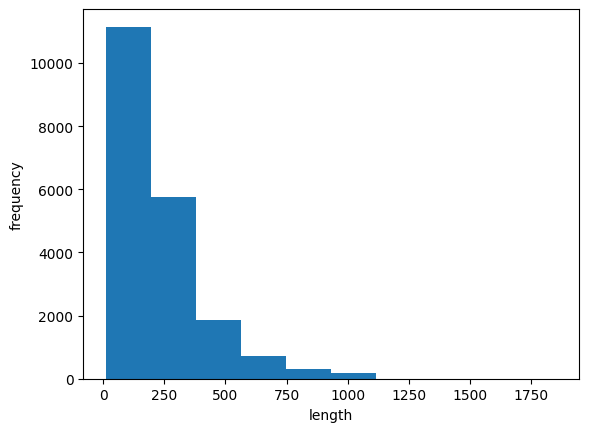

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


훈련 세트 전처리
- 토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦

In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

##순환 신경망 만들기

In [17]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 300)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))

1.0


원- 핫 인코딩
- 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 0으로 변환

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 36ms/step - loss: 0.7060 - accuracy: 0.4933 - val_loss: 0.7011 - val_accuracy: 0.4990
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6988 - accuracy: 0.4911

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 17s 54ms/step - loss: 0.6984 - accuracy: 0.5028 - val_loss: 0.6972 - val_accuracy: 0.5058
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6941 - accuracy: 0.5146 - val_loss: 0.6933 - val_accuracy: 0.5194
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6883 - accuracy: 0.5368 - val_loss: 0.6862 - val_accuracy: 0.5484
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6781 - accuracy: 0.5764 - val_loss: 0.6770 - val_accuracy: 0.5866
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6672 - accuracy: 0.6053 - val_loss: 0.6677 - val_accuracy: 0.6100
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6561 - accuracy: 0.6274 - val_loss: 0.6598 - val_accuracy: 0.6184
Epoch 8/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6443 - accuracy: 0.6463 - val_loss: 0.6465 - val_accuracy: 0.63

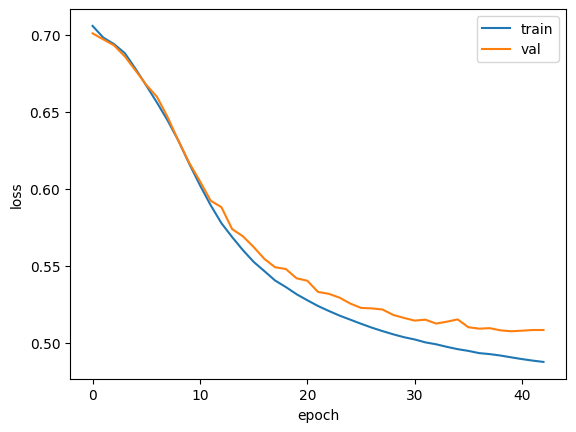

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


##단어 임베딩 사용하기

In [27]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6935 - accuracy: 0.5084 - val_loss: 0.6919 - val_accuracy: 0.5248
Epoch 2/100
  5/313 [..............................] - ETA: 9s - loss: 0.6950 - accuracy: 0.4781

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 25ms/step - loss: 0.6843 - accuracy: 0.5757 - val_loss: 0.6752 - val_accuracy: 0.6182
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6658 - accuracy: 0.6363 - val_loss: 0.6544 - val_accuracy: 0.6660
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6431 - accuracy: 0.6763 - val_loss: 0.6330 - val_accuracy: 0.6898
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6214 - accuracy: 0.7020 - val_loss: 0.6169 - val_accuracy: 0.7002
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6034 - accuracy: 0.7160 - val_loss: 0.5969 - val_accuracy: 0.7270
Epoch 7/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5875 - accuracy: 0.7285 - val_loss: 0.5857 - val_accuracy: 0.7174
Epoch 8/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5735 - accuracy: 0.7347 - val_loss: 0.5700 - val_accuracy: 0.7424
Epoc

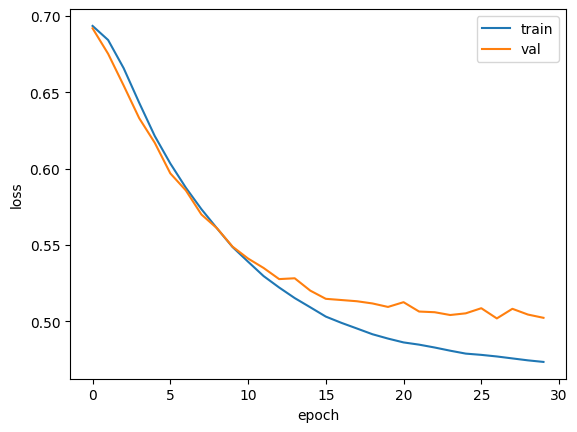

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()